In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [46]:
dataset = pd.read_csv(r'C:\Users\N\Desktop\Stock market prediction\Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [47]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [48]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


<AxesSubplot:xlabel='Date'>

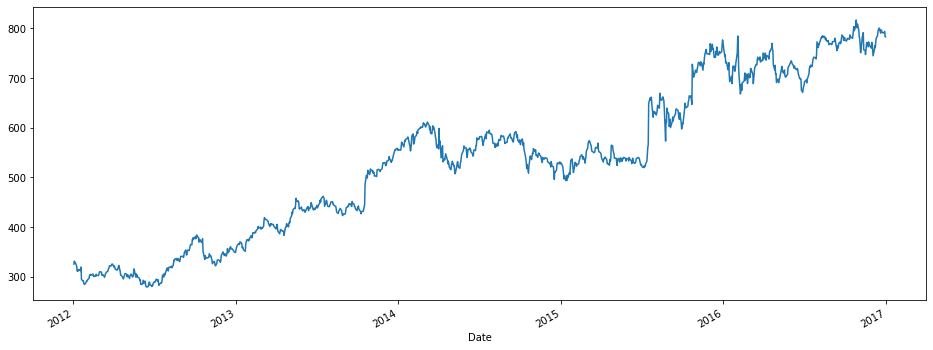

In [50]:
dataset['Open'].plot(figsize=(16,6))

In [51]:
dataset["Close"]=dataset["Close"].str.replace(',','').astype(float)

In [52]:
dataset["Volume"]=dataset["Volume"].str.replace(',','').astype(float)

In [53]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


<AxesSubplot:xlabel='Date'>

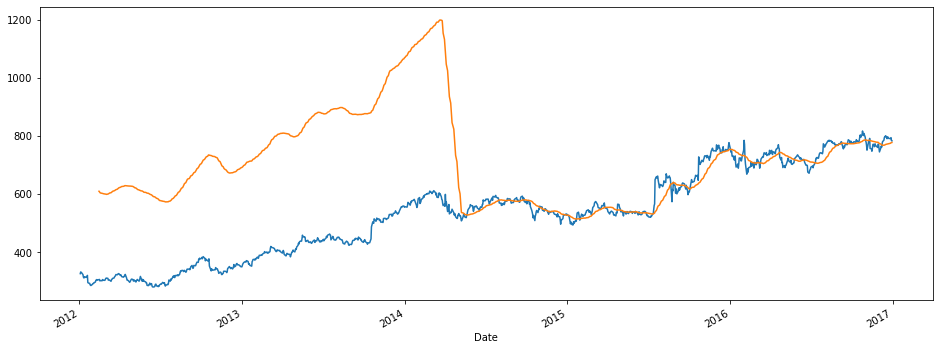

In [54]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

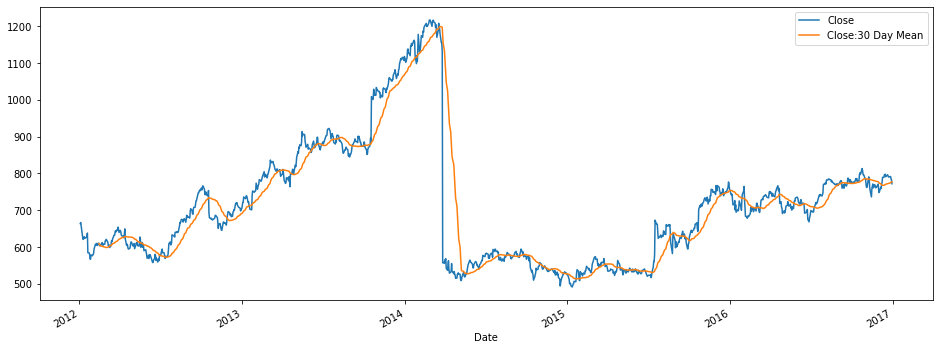

In [55]:
dataset['Close:30 Day Mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close:30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

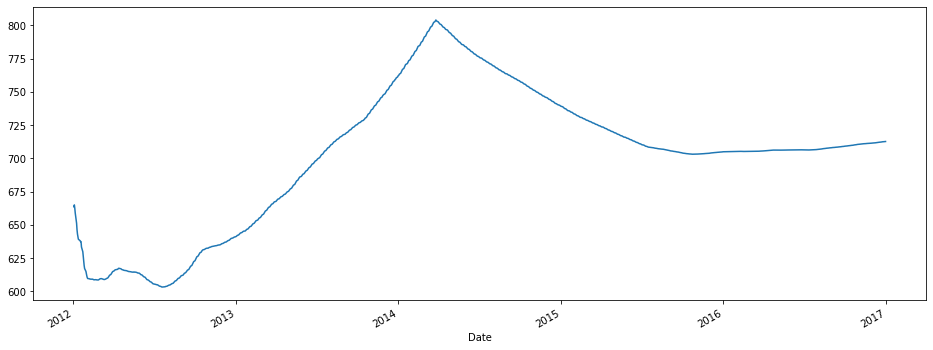

In [56]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [57]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [58]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [59]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train), np.array(y_train)

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [61]:
regressor=Sequential()


In [62]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [63]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 18s 172ms/step - loss: 0.0403
Epoch 2/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0039
Epoch 9/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0041
Epoch 13/100

38/38 [==============================] - 6s 163ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0014


In [65]:
dataset_test=pd.read_csv('C:/Users/N/Desktop/Stock market prediction/Google_Stock_Price_Train.csv', index_col="Date", parse_dates=True)

In [66]:
real_stock_price=dataset_test.iloc[:, 1:2].values

In [67]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [68]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [69]:
dataset_test["Volume"]=dataset_test["Volume"].str.replace(',','').astype(float)

In [70]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [71]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [72]:
dataset_total=pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price=regressor.predict(X_test)
pred_price=sc.inverse_transform(pred_price)

In [73]:
pred_price=pd.DataFrame(pred_price)
pred_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


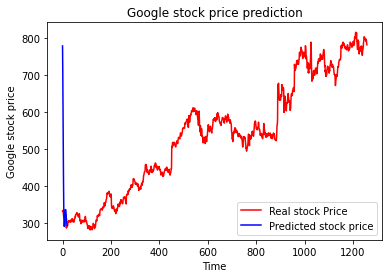

In [74]:
plt.plot(real_stock_price, color="red", label="Real stock Price")
plt.plot(pred_price, color="blue", label="Predicted stock price")
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()